In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from glob import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
from fastcore.xtras import load_pickle

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(["science", "nature"])

import matplotx
import numpy as np
import pandas as pd

%matplotlib inline

In [3]:
all_res = glob("out/**/*.pkl")

In [4]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)
    repre = loaded["representation"]
    num_points = loaded["num_train_points"]

    metrics = {
        "representation": loaded["representation"],
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["mean_absolute_error"],
        "max_error": loaded["max_error"],
        "mse": loaded["mean_squared_error"],
    }

    compiled_res.append(metrics)

    gpr_metrics = {
        "num_train_points": loaded["num_train_points"],
        "mae": loaded["gpr_baseline"]["mean_absolute_error"],
        "max_error": loaded["gpr_baseline"]["max_error"],
        "mse": loaded["gpr_baseline"]["mean_squared_error"],
    }

    compiled_gpr.append(gpr_metrics)

In [5]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [6]:
compiled_grouped_res = compiled_res.groupby(["representation", "num_train_points"]).agg(
    ["mean", "std"]
)

In [7]:
compiled_gpr_grouped = compiled_gpr.groupby(["num_train_points"]).agg(["mean", "std"])

In [8]:
compiled_grouped_res

mae            max_error            \
                                     mean       std       mean       std   
representation num_train_points                                            
smiles         10                3.532165  0.280491  20.870000  3.914464   
               20                3.335497  0.295660  23.942857  0.718534   
               50                2.594349  0.138203  19.887143  1.539012   
               100               2.278264  0.439438  15.078000  4.763745   
               200               1.427512  0.068145  10.250000  3.017441   

                                       mse            
                                      mean       std  
representation num_train_points                       
smiles         10                21.094200  2.843379  
               20                20.176103  2.603758  
               50                13.043110  0.863987  
               100               10.327211  3.598889  
               200                4.500120  0.324428

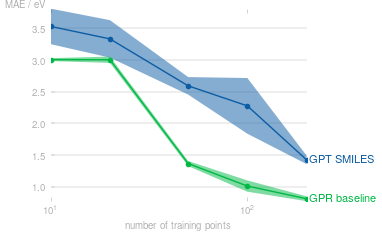

In [9]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1, 1)
    # ax.plot(
    #     compiled_grouped_res.loc["SELFIES", :].index,
    #     compiled_grouped_res.loc["SELFIES", :]['mae']['mean'],
    #     label='GPT SELFIES',
    #     marker='o'
    # )

    # ax.fill_between(
    #     compiled_grouped_res.loc["SELFIES", :].index,
    #     compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] - compiled_grouped_res.loc["SELFIES", :]['mae']['std'],
    #     compiled_grouped_res.loc["SELFIES", :]['mae']['mean'] + compiled_grouped_res.loc["SELFIES", :]['mae']['std'],
    # )

    ax.plot(
        compiled_grouped_res.loc["smiles", :].index,
        compiled_grouped_res.loc["smiles", :]["mae"]["mean"],
        label="GPT SMILES",
        marker="o",
    )

    ax.fill_between(
        compiled_grouped_res.loc["smiles", :].index,
        compiled_grouped_res.loc["smiles", :]["mae"]["mean"]
        - compiled_grouped_res.loc["smiles", :]["mae"]["std"],
        compiled_grouped_res.loc["smiles", :]["mae"]["mean"]
        + compiled_grouped_res.loc["smiles", :]["mae"]["std"],
        alpha=0.5,
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped["mae"]["mean"],
        label="GPR baseline",
        marker="o",
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[:].index,
        compiled_gpr_grouped.loc[:]["mae"]["mean"] - compiled_gpr_grouped.loc[:]["mae"]["std"],
        compiled_gpr_grouped.loc[:]["mae"]["mean"] + compiled_gpr_grouped.loc[:]["mae"]["std"],
        alpha=0.5,
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel("number of training points", labelpad=4)
    matplotx.ylabel_top("MAE / eV")
    ax.set_xscale("log")

fig.savefig("freesolv_regression_res.pdf", bbox_inches="tight")